In [33]:
# Content-based recommender using cosine similarity over audio features
# Universe: tracks that appear in MPD AND have features AND have metadata (~514k tracks)

from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make src/ importable when running from notebooks/
PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

print("PROJECT_ROOT:", PROJECT_ROOT)

from src.features import load_feature_matrix

PROJECT_ROOT: C:\Users\Kiera\Music_Recommender


In [34]:
DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"

track_meta_path = DATA_PROCESSED / "track_metadata.csv"
meta_df = pd.read_csv(track_meta_path)

meta_df["track_id"] = meta_df["track_id"].astype(str)

print("track_metadata.csv shape:", meta_df.shape)
meta_df.head()


track_metadata.csv shape: (679889, 7)


,track_id,track_name,artist_name,album_name,artist_uri,album_uri,duration_ms
0,0000uJA4xCdxThagdLkkLR,Heart As Cold As Stone,Cherryholmes,Cherryholmes,spotify:artist:5kEVfWQGTw0rIDO2Jqq1ww,spotify:album:3SPMBGMEvPw21lmT5b1ApW,161186
1,00039MgrmLoIzSpuYKurn9,Thas What I Do,Zach Farlow,The Great Escape 2,spotify:artist:2jTojc4rAsOMx6200a8Ah1,spotify:album:0UHfgx3ITlxePDXLaN5Y6x,222727
2,0005w1bMJ7QAMl6DY98oxa,"Sonata in G Major, BuxWV 271: Allegro -",Dietrich Buxtehude,"Chamber Music: London Baroque - Rosenmuller, J...",spotify:artist:2YfFYZnshSzgfLsKZMM4VL,spotify:album:6oRWciCAwKegipcCc5FlWe,111573
3,0007AYhg2UQbEm88mxu7js,Mandarin Oranges Part 2,Little Simz,E.D.G.E,spotify:artist:6eXZu6O7nAUA5z6vLV8NKI,spotify:album:32RJzqlapfiU0fr2l4SSW9,198000
4,000CTwOSsvRs0bgXlwB64e,Shady World,Celly Cel,The Lost Tapes,spotify:artist:6k7TX5dxiKZiwMWTn8ZKbl,spotify:album:6LOmO9x8uPwlc3gSXZqqi8,155238


In [35]:
# Set of track_ids that have metadata (MPD universe)
meta_id_set = set(meta_df["track_id"])

# Load feature matrix ONLY for these track_ids
X_norm, track_ids, track_id_to_idx, feat_df = load_feature_matrix(
    allowed_track_ids=meta_id_set
)

print("Feature matrix shape (n_tracks, n_features):", X_norm.shape)
print("Number of unique track_ids in feature matrix:", len(track_ids))

# Check average L2 norm (should be ~1, since load_feature_matrix standardizes + L2-normalizes)
row_norms = np.linalg.norm(X_norm, axis=1)
print("Mean row L2 norm:", row_norms.mean())
print("Std of row L2 norm:", row_norms.std())


Feature matrix shape (n_tracks, n_features): (514672, 13)
Number of unique track_ids in feature matrix: 514672
Mean row L2 norm: 1.0
Std of row L2 norm: 4.6481937e-08


In [36]:
feature_id_set = set(track_ids)

meta_df_filtered = meta_df[meta_df["track_id"].isin(feature_id_set)].copy()

print("Tracks in feature matrix:", len(feature_id_set))
print("Tracks with metadata:   ", len(meta_df))
print("Overlap (features ∩ meta):", len(meta_df_filtered))

meta_df_filtered.head()


Tracks in feature matrix: 514672
Tracks with metadata:    679889
Overlap (features ∩ meta): 514672


,track_id,track_name,artist_name,album_name,artist_uri,album_uri,duration_ms
0,0000uJA4xCdxThagdLkkLR,Heart As Cold As Stone,Cherryholmes,Cherryholmes,spotify:artist:5kEVfWQGTw0rIDO2Jqq1ww,spotify:album:3SPMBGMEvPw21lmT5b1ApW,161186
1,00039MgrmLoIzSpuYKurn9,Thas What I Do,Zach Farlow,The Great Escape 2,spotify:artist:2jTojc4rAsOMx6200a8Ah1,spotify:album:0UHfgx3ITlxePDXLaN5Y6x,222727
2,0005w1bMJ7QAMl6DY98oxa,"Sonata in G Major, BuxWV 271: Allegro -",Dietrich Buxtehude,"Chamber Music: London Baroque - Rosenmuller, J...",spotify:artist:2YfFYZnshSzgfLsKZMM4VL,spotify:album:6oRWciCAwKegipcCc5FlWe,111573
5,000JBgYWfJQqdFaRqu2n3f,Li'l Darlin',Joe Pass,Portrait,spotify:artist:4DuZTASH5eSyd0K73W6fuZ,spotify:album:2zm8AkHjOhwdvnj8NSVg6g,227626
6,000JCyEkMFumqCZQJAORiQ,California Water,Nipsey Hussle,Enough Is Enough,spotify:artist:0EeQBlQJFiAfJeVN2vT9s0,spotify:album:4pfWrpnLFM1jHiw3foRpKK,207124


In [37]:
def describe_tracks(track_id_list, top_n=10):
    """
    Given a list/array of track_ids, return a nice DataFrame with
    track_name, artist_name, album_name.
    """
    df = pd.DataFrame({"track_id": list(track_id_list)})
    df = df.merge(meta_df_filtered, on="track_id", how="left")
    return df.head(top_n)


# Example: show some random tracks from the feature space
np.random.seed(0)
random_idxs = np.random.choice(len(track_ids), size=5, replace=False)
describe_tracks(track_ids[random_idxs])


,track_id,track_name,artist_name,album_name,artist_uri,album_uri,duration_ms
0,2guo3CprPmlO7YN18AHY8l,"Prélude et fugue 2 en ut majeur, Bw 847 (1er l...",Johann Sebastian Bach,Bach : Le clavier bien tempéré,spotify:artist:5aIqB5nVVvmFsvSdExz408,spotify:album:6eD9PrgXHms0RtB2d5MNfH,184884
1,5wzUTd5rsxCc1Dt0C9a27B,The Whale Song,Modest Mouse,"No One's First, And You're Next",spotify:artist:1yAwtBaoHLEDWAnWR87hBT,spotify:album:4YvdAtWh6LlnIrv0qIqkCF,364733
2,0Oss98zJQb1DPCHXP7DLFv,The Neighborhood Is Bleeding,Manchester Orchestra,I'm Like A Virgin Losing A Child,spotify:artist:5wFXmYsg3KFJ8BDsQudJ4f,spotify:album:7criqG4fAIy0N0TdRpL2SA,168826
3,097rKjclHIS3Bhq2kvisT5,Diet Coke Slutz,Knowmads,Knowmads,spotify:artist:6aUKy2LG1OU6KhYOZADolN,spotify:album:3wzgOT3wNoYEUPUgx0WTjB,250228
4,4C7BIBovuWAhOtSfTkJxrS,I'm a Nut,Caspar Babypants,More Please!,spotify:artist:4wwj0BGZ6T61LB1jBWdo0n,spotify:album:4IjjmD5S292op49x0kc677,176360


In [67]:
def most_similar_tracks(query_track_id: str, top_k: int = 10) -> pd.DataFrame:
    """
    Given a track_id, return top_k most similar tracks based on cosine similarity
    in the feature space (excluding the query track itself).

    Returns a DataFrame with:
      track_id, similarity, track_name, artist_name, album_name.

    NOTE: This version does NOT attach feature columns.
    Feature columns can be merged separately from feat_df when needed.
    """
    if query_track_id not in track_id_to_idx:
        raise ValueError(f"track_id {query_track_id} not found in feature matrix.")

    q_idx = track_id_to_idx[query_track_id]
    q_vec = X_norm[q_idx]

    # Cosine similarity = dot product since rows are L2-normalised
    sims = X_norm @ q_vec

    # Exclude self
    sims[q_idx] = -1.0

    # Get top_k indices
    top_idxs = np.argsort(sims)[-top_k:][::-1]
    top_ids = [track_ids[i] for i in top_idxs]
    top_sims = sims[top_idxs]

    result = pd.DataFrame({
        "track_id": top_ids,
        "similarity": top_sims,
    })

    # Attach metadata (names, artists, albums)
    result = result.merge(meta_df_filtered, on="track_id", how="left")

    return result


In [39]:
def find_track_ids_by_name(query: str, max_results: int = 10) -> pd.DataFrame:
    """
    Simple case-insensitive search over track_name to help pick seeds.
    """
    mask = meta_df_filtered["track_name"].str.contains(query, case=False, na=False)
    results = meta_df_filtered[mask].head(max_results)
    return results[["track_id", "track_name", "artist_name", "album_name"]]


# Example:
find_track_ids_by_name("Toxic", max_results=10)


,track_id,track_name,artist_name,album_name
140,007ZSFFUMZD0rVCuxO5WHK,Intoxicated,Joomanji,BamaLoveSoul presents On Deck 2
20940,0EkB09i9ohIUnsw45jzEyf,Toxic,Yael Naim,Yael Naim
21720,0FHdsktY5TApHrZLD3scIs,Intoxicated,Now And On Earth,Blacked Out
23674,0GgLVyWNBhHPl6sboaw3l9,Intoxicated,Hinder,When The Smoke Clears
33201,0NNTDgJ0DUgMo97Y4QTJcO,Necrotoxic,Carnifex,Slow Death
48246,0Y5tjLcIvmGxg3fHIXLqyA,Toxic,My Enemies & I,Sick World
61574,0hcS7u5JNePMz53l77FyVd,Toxic Is Dead - Video Edit,The Toxic Avenger,Scion Sampler Vol. 26: The Toxic Avenger
61871,0hpeQ6d58mOycZa6GGEZdS,Toxic (Battements Tendus 1),Andrew Holdsworth,"Reimagined for Ballet Class (Pop), Vol. 1"
65716,0keA5kJmiFFypmbcl0Iq4M,Intoxicated,Groovecatcher,After The Rain
69242,0n8EJNX6HmAMbnSkOqGWEH,Intoxicated - Bonus Track,Obituary,Inked in Blood (Deluxe Version)


In [40]:
# Pick a seed track either manually by ID or via the search helper above.
# Example: take a random track from the metadata
np.random.seed(42)
seed_track_id = meta_df_filtered["track_id"].sample(1).iloc[0]

seed_row = meta_df_filtered[meta_df_filtered["track_id"] == seed_track_id]
print("Seed track:")
seed_row[["track_name", "artist_name", "album_name", "track_id"]]


Seed track:


,track_name,artist_name,album_name,track_id
582896,There's No Sky,Jaill,There's No Sky (Oh My My),6g9KOSbMv76BzRmsL5eoRo


In [41]:
recs = most_similar_tracks(seed_track_id, top_k=15)

print("Recommendations:")
recs[["track_name", "artist_name", "album_name", "similarity", "danceability", "energy", "valence", "tempo"]]


Recommendations:


,track_name,artist_name,album_name,similarity,danceability,energy,valence,tempo
0,A Girl Like You,Nobodys,The Smell Of Victory,0.977009,0.240,0.896,0.738,174.778
1,Surfs You Right,Laika & The Cosmonauts,Cosmopolis,0.971987,0.168,0.783,0.640,172.841
2,Sweet Talk,Cosmonauts,Persona Non Grata,0.970039,0.246,0.856,0.518,136.422
3,Marquis In Spades,The Smashing Pumpkins,Rarities & B-Sides,0.968152,0.206,0.867,0.571,168.516
4,Baby,The Babies,Our House on the Hill,0.967994,0.270,0.807,0.661,157.057
5,Drunks,The Gits,Enter: The Conquering Chicken,0.967553,0.156,0.988,0.586,150.724
6,$20 Peanut,Weedeater,God Luck and Good Speed,0.967186,0.156,0.802,0.530,139.053
7,Keep It Gold,Maserati,The Language Of Cities,0.965686,0.127,0.803,0.537,174.604
8,Half Asleep,Korey Dane,Chamber Girls,0.964639,0.316,0.874,0.641,157.484
9,Neighbour Riffs,Surfer Blood,Astro Coast,0.964224,0.264,0.783,0.544,158.305


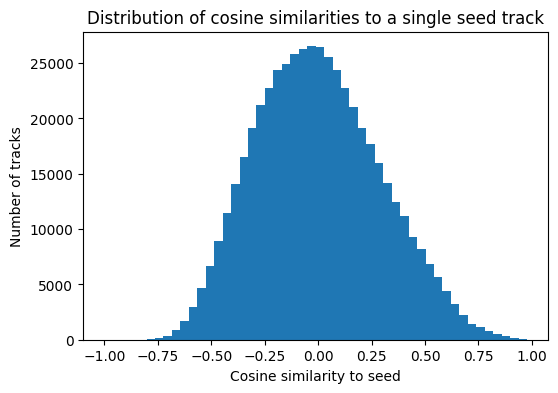

In [42]:
# Compute similarity to ALL tracks for the current seed
q_idx = track_id_to_idx[seed_track_id]
q_vec = X_norm[q_idx]
sims_all = X_norm @ q_vec

# Exclude self
sims_all[q_idx] = -1.0

plt.figure(figsize=(6, 4))
plt.hist(sims_all, bins=50)
plt.xlabel("Cosine similarity to seed")
plt.ylabel("Number of tracks")
plt.title("Distribution of cosine similarities to a single seed track")
plt.show()


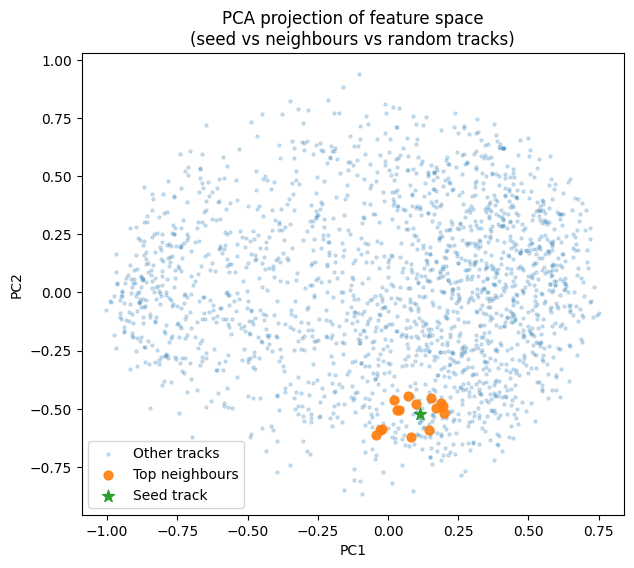

In [43]:
from sklearn.decomposition import PCA

# Sample some random tracks + the top neighbours + the seed
np.random.seed(123)

n_background = 2000  # number of random background points to plot
all_indices = np.arange(len(track_ids))

# Take a random background subset
bg_indices = np.random.choice(all_indices, size=min(n_background, len(all_indices)), replace=False)

# Indices of the top neighbours
top_k = 15
top_recs = most_similar_tracks(seed_track_id, top_k=top_k)
top_indices = np.array([track_id_to_idx[tid] for tid in top_recs["track_id"]])

# Combine seed, neighbours, and background
indices_to_plot = np.unique(np.concatenate([[q_idx], top_indices, bg_indices]))
X_subset = X_norm[indices_to_plot]

# PCA to 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_subset)

# Map from global index -> index in X_2d
global_to_2d_idx = {g: i for i, g in enumerate(indices_to_plot)}

seed_2d = X_2d[global_to_2d_idx[q_idx]]
top_2d = X_2d[[global_to_2d_idx[i] for i in top_indices]]
bg_2d = X_2d[[global_to_2d_idx[i] for i in bg_indices if i in global_to_2d_idx]]

plt.figure(figsize=(7, 6))

# Background cloud
plt.scatter(bg_2d[:, 0], bg_2d[:, 1], s=5, alpha=0.2, label="Other tracks")

# Neighbours
plt.scatter(top_2d[:, 0], top_2d[:, 1], s=40, alpha=0.9, label="Top neighbours")

# Seed
plt.scatter(seed_2d[0], seed_2d[1], s=80, marker="*", label="Seed track")

plt.legend()
plt.title("PCA projection of feature space\n(seed vs neighbours vs random tracks)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [44]:
# Load interactions (built from MPD, e.g. via src/build_interactions.py)
interactions_path = DATA_PROCESSED / "interactions.parquet"
interactions = pd.read_parquet(interactions_path)

interactions["track_id"] = interactions["track_id"].astype(str)

# Keep only interactions whose tracks exist in our feature matrix universe
feature_id_set = set(track_ids)
interactions = interactions[interactions["track_id"].isin(feature_id_set)].copy()

print("Interactions shape after filtering to feature-space tracks:", interactions.shape)
interactions.head()


Interactions shape after filtering to feature-space tracks: (6175813, 4)


,pid,track_id,pos,duration_ms
0,0,0UaMYEvWZi0ZqiDOoHU3YI,0,226863
1,0,6I9VzXrHxO9rA9A5euc8Ak,1,198800
2,0,0WqIKmW4BTrj3eJFmnCKMv,2,235933
3,0,1AWQoqb9bSvzTjaLralEkT,3,267266
4,0,1lzr43nnXAijIGYnCT8M8H,4,227600


In [45]:
from collections import defaultdict
import random

def evaluate_cosine_on_playlists(num_playlists: int = 500, top_k: int = 10, seed: int = 0):
    """
    Simple offline evaluation:
      - sample playlists with at least 2 tracks
      - pick 1 seed track per playlist
      - check how many other tracks from that playlist appear in the top_k recommendations.

    Returns:
      avg_recall_at_k, avg_hit_rate_at_k, n_eval_playlists
    """
    rng = random.Random(seed)

    # Build mapping: pid -> list of track_ids
    playlist_to_tracks = defaultdict(list)
    for row in interactions.itertuples(index=False):
        playlist_to_tracks[row.pid].append(row.track_id)

    all_pids = [pid for pid, tracks in playlist_to_tracks.items() if len(tracks) >= 2]
    if len(all_pids) == 0:
        raise ValueError("No playlists with 2+ tracks after filtering.")

    sampled_pids = rng.sample(all_pids, min(num_playlists, len(all_pids)))

    recalls = []
    hits = []

    for pid in sampled_pids:
        tracks = playlist_to_tracks[pid]
        seed_track = rng.choice(tracks)
        relevant = set(tracks) - {seed_track}

        if not relevant:
            continue

        try:
            rec_df = most_similar_tracks(seed_track, top_k=top_k)
        except ValueError:
            continue

        rec_ids = list(rec_df["track_id"])
        rec_set = set(rec_ids)

        n_hits = len(relevant & rec_set)
        recall = n_hits / len(relevant)
        hit = 1.0 if n_hits > 0 else 0.0

        recalls.append(recall)
        hits.append(hit)

    avg_recall = float(np.mean(recalls)) if recalls else 0.0
    avg_hit_rate = float(np.mean(hits)) if hits else 0.0

    return avg_recall, avg_hit_rate, len(recalls)


avg_recall_10, avg_hit_10, n_eval = evaluate_cosine_on_playlists(num_playlists=500, top_k=10, seed=42)
print(f"Evaluated on {n_eval} playlists.")
print(f"Average Recall@10:  {avg_recall_10:.4f}")
print(f"Average HitRate@10: {avg_hit_10:.4f}")


Evaluated on 500 playlists.
Average Recall@10:  0.0004
Average HitRate@10: 0.0120


In [68]:
# Identify the audio feature columns (everything except track_id)
feature_cols = [c for c in feat_df.columns if c != "track_id"]
print("Feature columns used for differences:", feature_cols)

# Compute global mean and std for each feature (used to normalise differences)
feature_stats = feat_df[feature_cols].agg(["mean", "std"])
feat_means = feature_stats.loc["mean"]
feat_stds = feature_stats.loc["std"].replace(0, 1.0)  # avoid division by zero

feature_stats


Feature columns used for differences: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'key', 'mode']


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key,mode
mean,0.557650,0.607277,-8.880156,0.088019,0.317553,0.171066,0.207499,0.474457,120.566945,242338.721075,3.896175,5.259620,0.658693
std,0.179049,0.254951,5.129729,0.106231,0.336128,0.316723,0.186417,0.262085,29.735955,124007.575767,0.433795,3.563163,0.474149


In [71]:
def recommend_by_name_with_differences(
    query: str,
    candidate_index: int = 0,
    top_k: int = 15,
) -> pd.DataFrame:
    """
    1. Search for tracks by name (using find_track_ids_by_name).
    2. Pick one of the matches (candidate_index).
    3. Get top_k cosine-similar tracks.
    4. For each recommended track, compute which feature
       is most different from the seed (in normalised units).

    Returns:
        DataFrame of recommendations with:
          - track_name, artist_name, album_name
          - similarity
          - all *available* audio features
          - most_diff_feature, most_diff_abs_zdiff
    """
    # --- 1. Search by name ---
    matches = find_track_ids_by_name(query, max_results=20)

    if matches.empty:
        raise ValueError(f"No tracks found matching '{query}'")

    if candidate_index < 0 or candidate_index >= len(matches):
        raise IndexError(
            f"candidate_index {candidate_index} is out of range for {len(matches)} matches"
        )

    print("Search results:")
    display(matches.reset_index(drop=True))

    # --- 2. Choose seed track ---
    chosen = matches.iloc[candidate_index]
    seed_id = chosen["track_id"]

    print("\nChosen seed track:")
    display(chosen[["track_name", "artist_name", "album_name", "track_id"]])

    # --- 3. Get recommendations (metadata + similarity only) ---
    recs_basic = most_similar_tracks(seed_id, top_k=top_k)

    # Determine which feature columns are actually available in feat_df
    # and present in recs after merge
    global feature_cols, feat_means, feat_stds  # use the ones defined earlier

    # Merge in full feature set for seed + recs
    recs = recs_basic.merge(
        feat_df[["track_id"] + feature_cols],
        on="track_id",
        how="left"
    )

    # Now compute the *local* list of feature cols that actually exist in recs
    local_feature_cols = [c for c in feature_cols if c in recs.columns]
    if not local_feature_cols:
        raise ValueError("No feature columns found in recommendations DataFrame.")

    # --- 4. Seed feature vector (restricted to available columns) ---
    seed_features = (
        feat_df[feat_df["track_id"] == seed_id]
        .set_index("track_id")
        .loc[seed_id, local_feature_cols]
        .astype(float)
    )

    # Build per-feature mean/std restricted to these columns
    local_means = feat_means[local_feature_cols]
    local_stds = feat_stds[local_feature_cols].replace(0, 1.0)

    # --- 5. Compute normalised differences per feature (z-space) ---
    seed_z = (seed_features - local_means) / local_stds

    most_diff_features = []
    most_diff_values = []

    for _, row in recs.iterrows():
        rec_feat = row[local_feature_cols].astype(float)
        rec_z = (rec_feat - local_means) / local_stds

        diff_z = (rec_z - seed_z).abs()
        max_feature = diff_z.idxmax()
        max_value = diff_z[max_feature]

        most_diff_features.append(max_feature)
        most_diff_values.append(max_value)

    recs["most_diff_feature"] = most_diff_features
    recs["most_diff_abs_zdiff"] = most_diff_values

    # --- 6. Pretty-print seed features ---
    display_seed = (
        pd.DataFrame(seed_features)
        .T.assign(
            track_id=seed_id,
            track_name=chosen["track_name"],
            artist_name=chosen["artist_name"],
            album_name=chosen["album_name"],
        )[["track_id", "track_name", "artist_name", "album_name"] + local_feature_cols]
    )

    print("\nSeed track audio features (available columns):")
    display(display_seed)

    # --- 7. Pretty-print recs + features + diffs ---
    cols_to_show = (
        ["track_name", "artist_name", "album_name", "similarity"] +
        local_feature_cols +
        ["most_diff_feature", "most_diff_abs_zdiff"]
    )

    print("\nRecommendations with audio features and most different feature (normalised):")
    display(recs[cols_to_show])

    return recs


In [77]:
recs = recommend_by_name_with_differences("pass out", candidate_index=2, top_k=15)


Search results:


,track_id,track_name,artist_name,album_name
0,1JgWCIOPxGl7IvlIkqO4Oq,Pass Out,Ludacris,The Red Light District
1,1ZPjHKNfc0H83gZDoGFjya,Pass out (Original Version),Chrishan,The Ultimate Collection
2,2cY7WSxFIsZQaoDNJe7Fz3,Pass Out,Tinie Tempah,Disc-Overy
3,47aEKbvbgAD3cPoorJQzj1,Pass Out,Chris Brown,Graffiti
4,6M2SAwhhWxPZ6lekYwj8dK,Until I Pass Out,Uncle Reece,Until I Pass Out
5,6zh56VneNv8XcYzv32hCkx,Party Pass Out,Taylor Gang,"TGOD, Vol. 1"



Chosen seed track:


track_name                   Pass Out
artist_name              Tinie Tempah
album_name                 Disc-Overy
track_id       2cY7WSxFIsZQaoDNJe7Fz3
Name: 229227, dtype: object


Seed track audio features (available columns):


,track_id,track_name,artist_name,album_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key,mode
2cY7WSxFIsZQaoDNJe7Fz3,2cY7WSxFIsZQaoDNJe7Fz3,Pass Out,Tinie Tempah,Disc-Overy,0.693,0.891,-3.261,0.296,0.0281,0.0,0.143,0.532,91.1,4.0,1.0,1.0



Recommendations with audio features and most different feature (normalised):


,track_name,artist_name,album_name,similarity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key,mode,most_diff_feature,most_diff_abs_zdiff
0,Monotony,Afu-Ra,Body Of The Life Force,0.987014,0.689,0.949,-3.194,0.350,0.09260,0.000000,0.1040,0.501,92.350,4.0,1,1,speechiness,0.508326
1,Jeff N Fess feat. Rhymefest,DJ Jazzy Jeff,The Return Of The Magnificent,0.985707,0.663,0.930,-4.645,0.328,0.06210,0.000000,0.1550,0.620,91.899,4.0,1,1,valence,0.335769
2,Swords Drawn,Army Of The Pharaohs,Jedi Mind Tricks presents The Best of Army of ...,0.984474,0.688,0.898,-3.704,0.320,0.00870,0.000000,0.0919,0.578,101.993,4.0,0,1,tempo,0.366324
3,Represent,Nas,Illmatic XX,0.981965,0.702,0.832,-4.964,0.318,0.02000,0.000003,0.1890,0.619,92.362,4.0,1,1,loudness,0.331986
4,Uh Oh,Talib Kweli,Gutter Rainbows,0.981329,0.620,0.848,-4.234,0.290,0.00531,0.000029,0.1720,0.531,82.710,4.0,2,1,danceability,0.407710
5,Sets Go Up (feat. Wacko) - feat. Wacko Explici...,Juvenile,Reality Check,0.980260,0.689,0.925,-4.658,0.248,0.10200,0.000022,0.0862,0.552,98.192,4.0,1,1,speechiness,0.451845
6,Kocky,Tech N9ne Collabos,Welcome to Strangeland,0.979936,0.690,0.858,-3.688,0.285,0.15100,0.000000,0.1120,0.601,78.976,4.0,1,1,tempo,0.407722
7,Daddy Fat Sax,Big Boi,Sir Lucious Left Foot...The Son Of Chico Dusty,0.979866,0.668,0.894,-3.376,0.325,0.01500,0.000000,0.1150,0.629,94.591,4.0,2,1,valence,0.370109
8,Floating to Nowhere,Lando Chill,"For Mark, Your Son",0.979470,0.734,0.839,-4.999,0.265,0.08430,0.000000,0.1870,0.566,86.936,4.0,1,1,loudness,0.338809
9,LA,Nelly,Brass Knuckles,0.979366,0.634,0.782,-4.693,0.274,0.04400,0.000000,0.1720,0.551,83.305,4.0,1,1,energy,0.427532
